In [ ]:
! pip install PyQt5 opencv-python numpy pandas scipy matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


--- Resultados da Regressão Polinomial (Grau 5) ---
Coeficientes (c5, c4, c3, c2, c1, c0): 
 [  99959.49809437 -195927.41202844  145199.41252664  -50757.70653493
   10008.74300479   -1431.87013392]

Equação da Linha de Tendência:
           5             4             3             2
9.996e+04 x - 1.959e+05 x + 1.452e+05 x - 5.076e+04 x + 1.001e+04 x - 1432
----------------------------------------------------



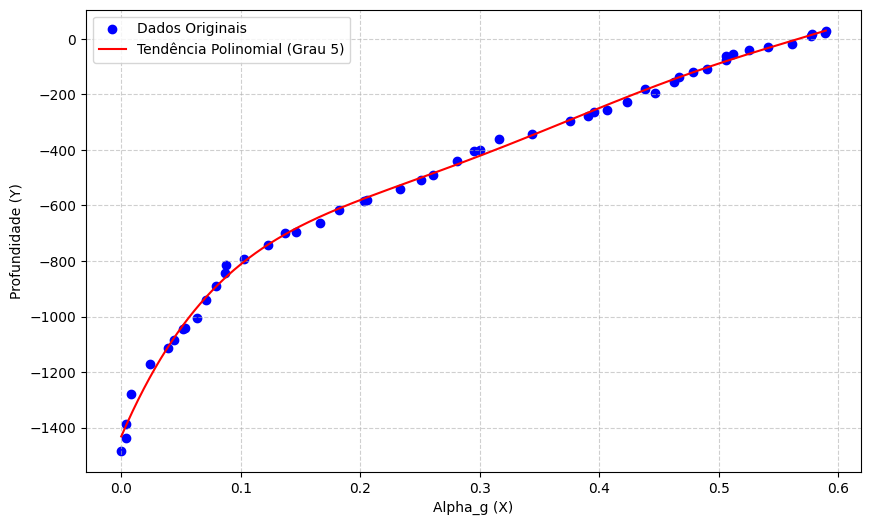

In [3]:
def plotar_dados_e_tendencia():
    """
    Lê o arquivo dados.tsv, plota alpha_g vs profundidade,
    e adiciona uma linha de tendência polinomial de grau 5.
    """
    nome_arquivo = "dados.tsv"
    
    # 1. Leitura e Preparação dos Dados
    try:
        # Lê o arquivo TSV (separado por tabulação)
        # Assumindo que a primeira linha contém os nomes das colunas: 'X' e 'Y'
        df = pd.read_csv(
            nome_arquivo, 
            sep='\t', 
            decimal='.' # Importante: Define o ponto como separador decimal
        )
        
        # Renomeia as colunas para o contexto do problema
        df = df.rename(columns={'X': 'alpha_g', 'Y': 'profundidade'})
        
        # Extrai as colunas para arrays NumPy
        x = df['alpha_g'].values
        y = df['profundidade'].values
        
    except FileNotFoundError:
        print(f"ERRO: O arquivo '{nome_arquivo}' não foi encontrado.")
        return
    except Exception as e:
        print(f"ERRO ao ler o arquivo: {e}")
        return

    # 2. Cálculo da Linha de Tendência Polinomial (Grau 5)
    
    # polyfit: Ajusta os dados a um polinômio de grau 5.
    # 'coefs' armazena os coeficientes do polinômio (do maior grau para o menor).
    grau_polinomial = 5
    coefs = np.polyfit(x, y, grau_polinomial)
    
    # poly1d: Cria a função polinomial a partir dos coeficientes.
    p = np.poly1d(coefs)
    

    # Imprimir os Coeficientes e a Equação
    print("\n--- Resultados da Regressão Polinomial (Grau 5) ---")
    print(f"Coeficientes (c5, c4, c3, c2, c1, c0): \n {coefs}")
    print("\nEquação da Linha de Tendência:")
    print(p)
    print("----------------------------------------------------\n")
    
    # Cria pontos de x para traçar a linha de tendência suave
    x_fit = np.linspace(x.min(), x.max(), 500)
    y_fit = p(x_fit)


    # 3. Plotagem do Gráfico
    
    plt.figure(figsize=(10, 6))
    
    # Plota os dados originais (scatter plot)
    plt.scatter(x, y, color='blue', label='Dados Originais', marker='o')
    
    # Plota a linha de tendência (regressão polinomial)
    plt.plot(x_fit, y_fit, color='red', linestyle='-', label=f'Tendência Polinomial (Grau {grau_polinomial})')
    
    # Configurações do Gráfico
    plt.xlabel('Alpha_g (X)')
    plt.ylabel('Profundidade (Y)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    # Exibe o gráfico
    plt.show()

# Executa a função principal
if __name__ == "__main__":
    plotar_dados_e_tendencia()

In [5]:
# Coeficientes do Polinômio (do maior grau ao termo constante - Novos Valores)
coeficientes = np.array([
    99959.49809437,   # c5
    -195927.41202844, # c4
    145199.41252664,  # c3
    -50757.70653493,  # c2
    10008.74300479,   # c1
    -1431.87013392    # c0
])

# Encontrar as raízes (os valores de x onde y=0)
raizes = np.roots(coeficientes)

print("Todas as 5 raízes (valores de x onde y=0):")
print(raizes)

Todas as 5 raízes (valores de x onde y=0):
[0.62889504+0.19677842j 0.62889504-0.19677842j 0.56671789+0.j
 0.06778001+0.23154942j 0.06778001-0.23154942j]


De acordo com as raízes encontradas e o comportamento do gráfico, sabemos que quando a profundidade é igual a 0, temos um alpha_g aproximado de 0,56671789%.